In [1]:
#Importing the libraries
import pandas as pd
import numpy as np

In [2]:
#read the file
ipl_auction_df = pd.read_csv("D://Sem 3//Hemlata Maam//IPL IMB381IPL2013.csv")

In [3]:
#checking the information/ null objects etc
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [4]:
#Displying 5 rows and 10 columsn of the data 
ipl_auction_df.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [5]:
x_features = ipl_auction_df.columns

In [6]:
#assigning the features to a variable name
x_features = ['AGE','COUNTRY','PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL',
              'CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B','SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']

In [7]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [8]:
#creating dummies
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,0,1


In [9]:
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [10]:
#creating the dummy set for the variable x_features
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[x_features], columns = categorical_features, drop_first = True )

In [11]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [12]:
x_features = ipl_auction_encoded_df.columns

In [13]:
#import statsmodel.api as sm
from statsmodels import api as sm
from sklearn.model_selection import train_test_split

x = sm.add_constant(ipl_auction_encoded_df)
y = ipl_auction_df['SOLD PRICE']
#Dividing the data into training and testing data
train_x, test_x, train_y,test_y = train_test_split(x,y, train_size = 0.8, random_state = 42)

C:\Users\admin\Anaconda New\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
#Printing the model summary and checking the p values for significant values
ipl_model_1 = sm.OLS(train_y, train_x).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2019-10-29 12:32        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [15]:
#Running the vif factor to remove the insignificant values
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(x):
    x_matrix = x.as_matrix()
    vif = [variance_inflation_factor( x_matrix, i) for i in range
           (x_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = x.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [16]:
vif_factors = get_vif_factors(x[x_features])
vif_factors

C:\Users\admin\Anaconda New\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [17]:
# variance inflation factor to check the and remove the multicolinearity

coulmns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

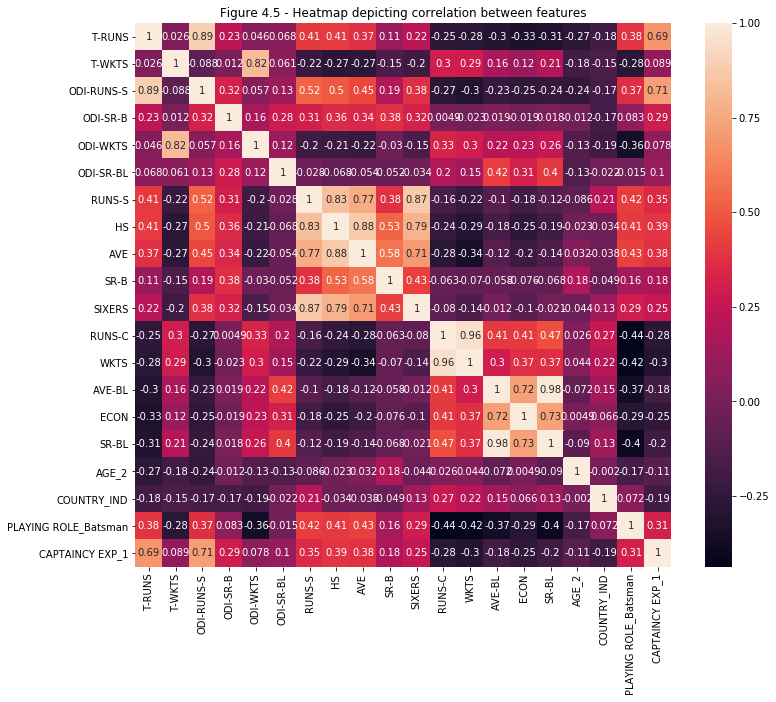

In [18]:
#Depting the correlating in Heat map
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
sn.heatmap(x[coulmns_with_large_vif].corr(), annot = True);
plt.title("Figure 4.5 - Heatmap depicting correlation between features");

In [19]:
#Removing the insignificant columns
columns_to_be_removed = ['T-RUNS','T-WKTS','RUNS-S','HS','AVE','RUNS-C','SR-B','AVE-BL','ODI-SR-B','ODI-RUNS-S','ECON','SR-BL','AGE-2']

In [20]:
x_new_features = list(set(x_features)-set(columns_to_be_removed))

In [21]:
get_vif_factors(x[x_new_features])

C:\Users\admin\Anaconda New\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,column,VIF
0,COUNTRY_PAK,1.453107
1,PLAYING ROLE_W. Keeper,2.164214
2,ODI-WKTS,2.842962
3,AGE_2,4.629426
4,ODI-SR-BL,2.876269
5,SIXERS,2.399054
6,PLAYING ROLE_Batsman,3.074394
7,COUNTRY_WI,1.300381
8,AGE_3,2.721214
9,COUNTRY_ZIM,1.209373


In [22]:
#Fitting the model summary after removing the insignificant values/columns
train_x = train_x[x_new_features]
ipl_model_2 = sm.OLS(train_y, train_x).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                    Adj. R-squared:           0.727     
Dependent Variable:         SOLD PRICE             AIC:                      2966.4571 
Date:                       2019-10-29 12:33       BIC:                      3016.7005 
No. Observations:           104                    Log-Likelihood:           -1464.2   
Df Model:                   19                     F-statistic:              15.57     
Df Residuals:               85                     Prob (F-statistic):       3.66e-20  
R-squared:                  0.777                  Scale:                    1.2137e+11
---------------------------------------------------------------------------------------
                          Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
---------------------------------------------------------------------------------------
COUNTRY_PAK            157200.3987 166815.6752  0.9424 0.3487 -174473.8548  488874.6522
PLAYING ROLE_W. Keeper -13010.5740 179872.4971 -0.0723 0.9425 -370645.2875  344624.1394
ODI-WKTS                  830.9993    478.6835  1.7360 0.0862    -120.7518    1782.7505
AGE_2                  -66690.6081  91291.9447 -0.7305 0.4671 -248203.4519  114822.2357
ODI-SR-BL                1040.0434   1283.5439  0.8103 0.4200   -1511.9858    3592.0725
SIXERS                   7916.5650   2093.6172  3.7813 0.0003    3753.8930   12079.2370
PLAYING ROLE_Batsman   152042.5275 114914.2899  1.3231 0.1894  -76437.8673  380522.9222
COUNTRY_WI              19989.4293 221311.8009  0.0903 0.9282 -420037.7220  460016.5805
AGE_3                  -58568.3030 119490.1055 -0.4902 0.6253 -296146.6450  179010.0389
COUNTRY_ZIM            -48126.2500 392864.9385 -0.1225 0.9028 -829246.9992  732994.4992
PLAYING ROLE_Bowler     -2657.5940 108463.5435 -0.0245 0.9805 -218312.1766  212996.9887
COUNTRY_NZ             178928.7927 160014.7646  1.1182 0.2666 -139223.4284  497081.0138
COUNTRY_SA             145240.7845 125760.5592  1.1549 0.2514 -104804.8995  395286.4684
WKTS                     2624.2506   2127.4413  1.2335 0.2208   -1605.6726    6854.1739
COUNTRY_BAN            -73492.3023 373413.2201 -0.1968 0.8444 -815937.8239  668953.2193
COUNTRY_SL              78575.2545 145998.5906  0.5382 0.5919 -211709.0578  368859.5667
CAPTAINCY EXP_1        207483.6127  98402.7625  2.1085 0.0379   11832.5581  403134.6672
COUNTRY_ENG            727210.2944 225053.9375  3.2313 0.0018  279742.7731 1174677.8156
COUNTRY_IND            296798.5553  98327.0970  3.0185 0.0034  101297.9438  492299.1668
---------------------------------------------------------------------------------------
Omnibus:                      7.277               Durbin-Watson:                  2.225
Prob(Omnibus):                0.026               Jarque-Bera (JB):               6.789
Skew:                         0.561               Prob(JB):                       0.034
Kurtosis:                     3.556               Condition No.:                  1506 
=======================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [24]:
#This model contains only the significant p values
significant_vars = ['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']
train_x = train_x[significant_vars]
ipl_model_3 = sm.OLS(train_y,train_x).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                 Adj. R-squared:        0.704     
Dependent Variable:      SOLD PRICE          AIC:                   2961.8089 
Date:                    2019-10-29 12:36    BIC:                   2972.3864 
No. Observations:        104                 Log-Likelihood:        -1476.9   
Df Model:                4                   F-statistic:           62.77     
Df Residuals:            100                 Prob (F-statistic):    1.97e-26  
R-squared:               0.715               Scale:                 1.3164e+11
------------------------------------------------------------------------------
                   Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
------------------------------------------------------------------------------
COUNTRY_IND     387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG     731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS            8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1 359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
------------------------------------------------------------------------------
Omnibus:                   1.130            Durbin-Watson:               2.238
Prob(Omnibus):             0.568            Jarque-Bera (JB):            0.874
Skew:                      0.223            Prob(JB):                    0.646
Kurtosis:                  3.046            Condition No.:               165  
==============================================================================

"""